In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Getting the data
https://www.kaggle.com/docs/api

In [2]:
!kaggle datasets list

ref                                                          title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned     Students Performance | Clean Dataset               10KB  2024-10-29 19:32:26           3797         72  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset      11KB  2024-09-28 20:21:12          24434        491  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                       22KB  2024-10-06 11:27:38          14112        201  1.0              
zeeshier/weather-forecast-dataset                            Weather Forecast Dataset

In [3]:
!kaggle datasets download blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# unzip data
import zipfile
with zipfile.ZipFile("telco-customer-churn.zip","r") as zip_ref:
    zip_ref.extractall("telco-customer-churn")

In [5]:
# reading data into a dataframe
import pandas as pd
df = pd.read_csv("./telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# inducing missing values for the sake of demonstration
import random
df.loc[df.sample(frac=0.01).index, 'TotalCharges'] = np.nan
df.loc[df.sample(frac=0.001).index, 'Churn'] = np.nan
df.loc[df.sample(frac=0.01).index, 'InternetService'] = np.nan

In [11]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService     70
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        70
Churn                7
dtype: int64

In [12]:
(df.isna().sum() / df.shape[0])*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.993895
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.993895
Churn               0.099389
dtype: float64

In [13]:
df['InternetService']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object

In [14]:
# As Internet Serive is a categorical variable, we can replace the missing values with the mode.
df['InternetService'] = df['InternetService'].fillna(df['InternetService'].mode()[0])

In [15]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [16]:
df["TotalCharges"].dtype

dtype('O')

In [17]:
# Replace non-numeric values with NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [19]:
# we can now replace the missing values with the mean
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [20]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               7
dtype: int64

In [21]:
df["Churn"]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [22]:
# Churn is the target variable, so it is not a good idea to replace the missing values with the mode
# We can just drop the rows with missing values
df = df.dropna(subset=["Churn"])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
# We can make all yes/no columns to 1/0
for col in df.columns:
    if df[col].dtype == 'object':
        if len(df[col].unique()) == 2:
            if 'No' in df[col].unique() and 'Yes' in df[col].unique():
                print(col)
                df[col] = df[col].map({'No': 0, 'Yes': 1})

Partner
Dependents
PhoneService
PaperlessBilling
Churn


/var/folders/mm/p6nmtghx1p1cg2s282w9mk3c0000gn/T/ipykernel_55349/106919930.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'No': 0, 'Yes': 1})
/var/folders/mm/p6nmtghx1p1cg2s282w9mk3c0000gn/T/ipykernel_55349/106919930.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'No': 0, 'Yes': 1})
/var/folders/mm/p6nmtghx1p1cg2s282w9mk3c0000gn/T/ipykernel_55349/106919930.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


# 2. Setting up the database

In [26]:
# Come up with the best schema
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [27]:
# Analyzing the data in each column
for col in df.columns:
    if df[col].dtype == 'object' and col != 'customerID':
        print(col)
        print("-"*50)
        print("Unique values: ", df[col].unique())
        print("-"*50)
        print("Value counts: ")
        print(df[col].value_counts())
        print("\n")

gender
--------------------------------------------------
Unique values:  ['Female' 'Male']
--------------------------------------------------
Value counts: 
gender
Male      3552
Female    3484
Name: count, dtype: int64


MultipleLines
--------------------------------------------------
Unique values:  ['No phone service' 'No' 'Yes']
--------------------------------------------------
Value counts: 
MultipleLines
No                  3388
Yes                 2967
No phone service     681
Name: count, dtype: int64


InternetService
--------------------------------------------------
Unique values:  ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Value counts: 
InternetService
Fiber optic    3132
DSL            2388
No             1516
Name: count, dtype: int64


OnlineSecurity
--------------------------------------------------
Unique values:  ['No' 'Yes' 'No internet service']
--------------------------------------------------
Value counts: 
OnlineSecurity
No 

## Database Schema
- customerID: VARCHAR(10)
- gender: ENUM('Female', 'Male')
- SeniorCitizen: BOOLEAN
- Partner: BOOLEAN
- Dependents: BOOLEAN
- tenure: SMALLINT UNSIGNED
- PhoneService: BOOLEAN
- MultipleLines: VARCHAR(20)
- InternetService: VARCHAR(15)
- OnlineSecurity: VARCHAR(20)
- OnlineBackup: VARCHAR(20)
- DeviceProtection: VARCHAR(20)
- TechSupport: VARCHAR(20)
- StreamingTV: VARCHAR(20)
- StreamingMovies: VARCHAR(20)
- Contract: VARCHAR(15)
- PaperlessBilling: BOOLEAN
- PaymentMethod: VARCHAR(30)
- MonthlyCharges: DECIMAL(10,2)
- TotalCharges: DECIMAL(10,2)
- Churn: BOOLEAN NOT NULL

In [28]:
import sqlite3
conn = sqlite3.connect('telco.db')

In [29]:
# Create a cursor
cursor = conn.cursor()

In [30]:
# Create the table
create_table_sql = '''
CREATE TABLE customers (
    customerID TEXT PRIMARY KEY,
    gender TEXT NOT NULL,
    SeniorCitizen INTEGER NOT NULL,
    Partner INTEGER NOT NULL,
    Dependents INTEGER NOT NULL,
    tenure INTEGER NOT NULL,
    PhoneService INTEGER NOT NULL,
    MultipleLines TEXT NOT NULL,
    InternetService TEXT NOT NULL,
    OnlineSecurity TEXT NOT NULL,
    OnlineBackup TEXT NOT NULL,
    DeviceProtection TEXT NOT NULL,
    TechSupport TEXT NOT NULL,
    StreamingTV TEXT NOT NULL,
    StreamingMovies TEXT NOT NULL,
    Contract TEXT NOT NULL,
    PaperlessBilling INTEGER NOT NULL,
    PaymentMethod TEXT NOT NULL,
    MonthlyCharges REAL NOT NULL,
    TotalCharges REAL NOT NULL,
    Churn INTEGER
);
'''
cursor.execute(create_table_sql)
conn.commit()

In [31]:
# describe the table
cursor.execute("PRAGMA table_info(customers);")
cursor.fetchall()

[(0, 'customerID', 'TEXT', 0, None, 1),
 (1, 'gender', 'TEXT', 1, None, 0),
 (2, 'SeniorCitizen', 'INTEGER', 1, None, 0),
 (3, 'Partner', 'INTEGER', 1, None, 0),
 (4, 'Dependents', 'INTEGER', 1, None, 0),
 (5, 'tenure', 'INTEGER', 1, None, 0),
 (6, 'PhoneService', 'INTEGER', 1, None, 0),
 (7, 'MultipleLines', 'TEXT', 1, None, 0),
 (8, 'InternetService', 'TEXT', 1, None, 0),
 (9, 'OnlineSecurity', 'TEXT', 1, None, 0),
 (10, 'OnlineBackup', 'TEXT', 1, None, 0),
 (11, 'DeviceProtection', 'TEXT', 1, None, 0),
 (12, 'TechSupport', 'TEXT', 1, None, 0),
 (13, 'StreamingTV', 'TEXT', 1, None, 0),
 (14, 'StreamingMovies', 'TEXT', 1, None, 0),
 (15, 'Contract', 'TEXT', 1, None, 0),
 (16, 'PaperlessBilling', 'INTEGER', 1, None, 0),
 (17, 'PaymentMethod', 'TEXT', 1, None, 0),
 (18, 'MonthlyCharges', 'REAL', 1, None, 0),
 (19, 'TotalCharges', 'REAL', 1, None, 0),
 (20, 'Churn', 'INTEGER', 0, None, 0)]

In [32]:
# Insert data into the table
for index, row in df.iterrows():
    cursor.execute('''
        INSERT INTO customers (
            customerID,
            gender,
            SeniorCitizen,
            Partner,
            Dependents,
            tenure,
            PhoneService,
            MultipleLines,
            InternetService,
            OnlineSecurity,
            OnlineBackup,
            DeviceProtection,
            TechSupport,
            StreamingTV,
            StreamingMovies,
            Contract,
            PaperlessBilling,
            PaymentMethod,
            MonthlyCharges,
            TotalCharges,
            Churn
        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        row['customerID'],
        row['gender'],
        row['SeniorCitizen'],
        row['Partner'],
        row['Dependents'],
        row['tenure'],
        row['PhoneService'],
        row['MultipleLines'],
        row['InternetService'],
        row['OnlineSecurity'],
        row['OnlineBackup'],
        row['DeviceProtection'],
        row['TechSupport'],
        row['StreamingTV'],
        row['StreamingMovies'],
        row['Contract'],
        row['PaperlessBilling'],
        row['PaymentMethod'],
        row['MonthlyCharges'],
        row['TotalCharges'],
        row['Churn']
    ))

# Commit the transaction and close the connection
conn.commit()

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## So, what are a few questions we can ask?

### Customer Demographics and Service Usage

In [34]:
def run_query(query):
    cursor.execute(query)
    return cursor.fetchall()

In [35]:
# How does tenure vary across different demographics, such as gender and age (SeniorCitizen status)?

query = '''
SELECT gender, SeniorCitizen, AVG(tenure) AS avg_tenure
FROM customers
GROUP BY gender, SeniorCitizen;
'''
run_query(query)

[('Female', 0, 32.15461090161124),
 ('Female', 1, 32.60670194003527),
 ('Male', 0, 32.206178643384824),
 ('Male', 1, 33.96341463414634)]

In [36]:
# What is the distribution of service usage (e.g., InternetService, StreamingTV, TechSupport) 
# across different customer groups, such as those with or without partners or dependents?

query = '''
SELECT Partner, Dependents, InternetService, StreamingTV, TechSupport, COUNT(*) AS customer_count
FROM customers
GROUP BY Partner, Dependents, InternetService, StreamingTV, TechSupport;
'''
run_query(query)

[(0, 0, 'DSL', 'No', 'No', 498),
 (0, 0, 'DSL', 'No', 'Yes', 258),
 (0, 0, 'DSL', 'Yes', 'No', 151),
 (0, 0, 'DSL', 'Yes', 'Yes', 182),
 (0, 0, 'Fiber optic', 'No', 'No', 653),
 (0, 0, 'Fiber optic', 'No', 'Yes', 106),
 (0, 0, 'Fiber optic', 'No internet service', 'No internet service', 1),
 (0, 0, 'Fiber optic', 'Yes', 'No', 536),
 (0, 0, 'Fiber optic', 'Yes', 'Yes', 223),
 (0, 0, 'No', 'No internet service', 'No internet service', 668),
 (0, 1, 'DSL', 'No', 'No', 64),
 (0, 1, 'DSL', 'No', 'Yes', 41),
 (0, 1, 'DSL', 'Yes', 'No', 16),
 (0, 1, 'DSL', 'Yes', 'Yes', 26),
 (0, 1, 'Fiber optic', 'No', 'No', 36),
 (0, 1, 'Fiber optic', 'No', 'Yes', 11),
 (0, 1, 'Fiber optic', 'No internet service', 'No internet service', 1),
 (0, 1, 'Fiber optic', 'Yes', 'No', 33),
 (0, 1, 'Fiber optic', 'Yes', 'Yes', 17),
 (0, 1, 'No', 'No internet service', 'No internet service', 116),
 (1, 0, 'DSL', 'No', 'No', 140),
 (1, 0, 'DSL', 'No', 'Yes', 118),
 (1, 0, 'DSL', 'Yes', 'No', 97),
 (1, 0, 'DSL', 'Yes', 

### Churn Analysis

In [37]:
# What are the most common characteristics of customers who churn (e.g., tenure, MonthlyCharges, specific services)?

query = '''
SELECT AVG(tenure) AS avg_tenure, AVG(MonthlyCharges) AS avg_monthly_charges, 
    InternetService, StreamingTV, OnlineSecurity, COUNT(*) AS churn_count
FROM customers
WHERE Churn = 1
GROUP BY InternetService, StreamingTV, OnlineSecurity
ORDER BY churn_count DESC;
'''
run_query(query)

[(24.126984126984127, 95.11728395061728, 'Fiber optic', 'Yes', 'No', 567),
 (11.902930402930403, 77.98836996336995, 'Fiber optic', 'No', 'No', 546),
 (8.0, 43.397410358565715, 'DSL', 'No', 'No', 251),
 (37.1764705882353, 102.52184873949584, 'Fiber optic', 'Yes', 'Yes', 119),
 (8.267857142857142,
  20.377232142857142,
  'No',
  'No internet service',
  'No internet service',
  112),
 (19.68421052631579, 54.611578947368436, 'DSL', 'Yes', 'No', 95),
 (19.29113924050633, 52.59240506329113, 'DSL', 'No', 'Yes', 79),
 (24.23076923076923, 84.08384615384617, 'Fiber optic', 'No', 'Yes', 65),
 (32.45161290322581, 68.80483870967743, 'DSL', 'Yes', 'Yes', 31),
 (5.0, 19.35, 'Fiber optic', 'No internet service', 'No internet service', 1)]

In [38]:
# How does the churn rate vary by payment method, contract type, and billing method (PaperlessBilling)?

query = '''
SELECT PaymentMethod, Contract, PaperlessBilling, 
    AVG(Churn) * 100 AS churn_rate
FROM customers
GROUP BY PaymentMethod, Contract, PaperlessBilling;
'''

run_query(query)

[('Bank transfer (automatic)', 'Month-to-month', 0, 26.82926829268293),
 ('Bank transfer (automatic)', 'Month-to-month', 1, 37.95811518324607),
 ('Bank transfer (automatic)', 'One year', 0, 6.432748538011696),
 ('Bank transfer (automatic)', 'One year', 1, 12.272727272727273),
 ('Bank transfer (automatic)', 'Two year', 0, 2.1739130434782608),
 ('Bank transfer (automatic)', 'Two year', 1, 4.529616724738676),
 ('Credit card (automatic)', 'Month-to-month', 0, 27.95031055900621),
 ('Credit card (automatic)', 'Month-to-month', 1, 34.81675392670157),
 ('Credit card (automatic)', 'One year', 0, 7.471264367816093),
 ('Credit card (automatic)', 'One year', 1, 12.5),
 ('Credit card (automatic)', 'Two year', 0, 1.9672131147540985),
 ('Credit card (automatic)', 'Two year', 1, 2.5454545454545454),
 ('Electronic check', 'Month-to-month', 0, 41.501103752759384),
 ('Electronic check', 'Month-to-month', 1, 57.664756446991404),
 ('Electronic check', 'One year', 0, 12.280701754385964),
 ('Electronic check

### Service and Billing Patterns

In [39]:
# What is the average MonthlyCharges for customers who have more than one service (e.g., MultipleLines, StreamingTV, StreamingMovies)?
query = '''
SELECT AVG(MonthlyCharges) AS avg_monthly_charges
FROM customers
WHERE MultipleLines = 'Yes' AND StreamingTV = 'Yes' AND StreamingMovies = 'Yes';
'''

run_query(query)

[(100.58859867330007,)]

In [40]:
# How do MonthlyCharges vary between customers with and without partners or dependents?
query = '''
SELECT Partner, Dependents, AVG(MonthlyCharges) AS avg_monthly_charges
FROM customers
GROUP BY Partner, Dependents;
'''

run_query(query)

[(0, 0, 62.98214285714263),
 (0, 1, 52.507202216066474),
 (1, 0, 74.95284503631979),
 (1, 1, 60.96585575271891)]

### Predicting Customer Lifetime Value

In [41]:
# How does tenure impact the TotalCharges accumulated by customers, 
# and does this trend differ across gender, SeniorCitizen status, or other demographics?
query = '''
SELECT gender, SeniorCitizen, tenure, AVG(TotalCharges) AS avg_total_charges
FROM customers
GROUP BY gender, SeniorCitizen, tenure
ORDER BY tenure;
'''

run_query(query)

[('Female', 0, 0, 2284.597278081011),
 ('Male', 0, 0, 2284.597278081011),
 ('Female', 0, 1, 49.91561181434595),
 ('Female', 1, 1, 110.618027193213),
 ('Male', 0, 1, 62.33187777986907),
 ('Male', 1, 1, 121.30121225848747),
 ('Female', 0, 2, 132.37425979124768),
 ('Female', 1, 2, 140.668),
 ('Male', 0, 2, 108.25111111111111),
 ('Male', 1, 2, 127.97222222222223),
 ('Female', 0, 3, 193.92640549518407),
 ('Female', 1, 3, 200.97857142857146),
 ('Male', 0, 3, 213.70164268365923),
 ('Male', 1, 3, 434.21338891645553),
 ('Female', 0, 4, 222.79097222222222),
 ('Female', 1, 4, 311.325),
 ('Male', 0, 4, 217.64358974358967),
 ('Male', 1, 4, 457.9297278081011),
 ('Female', 0, 5, 306.2230769230769),
 ('Female', 1, 5, 331.6428571428572),
 ('Male', 0, 5, 289.44912280701755),
 ('Male', 1, 5, 343.215),
 ('Female', 0, 6, 414.8387880770745),
 ('Female', 1, 6, 653.563896868716),
 ('Male', 0, 6, 357.49877390886076),
 ('Male', 1, 6, 471.2833333333333),
 ('Female', 0, 7, 404.1061403508771),
 ('Female', 1, 7, 51

In [42]:
# What is the average tenure for customers based on different InternetService types, and how does this affect their TotalCharges?
query = '''
SELECT InternetService, AVG(tenure) AS avg_tenure, AVG(TotalCharges) AS avg_total_charges
FROM customers
GROUP BY InternetService;
'''

run_query(query)

[('DSL', 32.81658291457286, 2124.858930698568),
 ('Fiber optic', 32.921136653895275, 3176.5568057536725),
 ('No', 30.483509234828496, 689.129411210992)]

### Customer Retention and Upselling

In [43]:
# What services are underutilized by long-tenured customers, suggesting opportunities for upselling?
query = '''
SELECT InternetService, StreamingTV, StreamingMovies, AVG(tenure) AS avg_tenure, COUNT(*) AS customer_count
FROM customers
GROUP BY InternetService, StreamingTV, StreamingMovies
HAVING avg_tenure > (SELECT AVG(tenure) FROM customers);
'''

run_query(query)

[('DSL', 'No', 'Yes', 35.43390804597701, 348),
 ('DSL', 'Yes', 'No', 35.30461538461538, 325),
 ('DSL', 'Yes', 'Yes', 47.70388349514563, 618),
 ('Fiber optic', 'No internet service', 'No internet service', 40.5, 8),
 ('Fiber optic', 'Yes', 'Yes', 43.465098634294385, 1318)]

In [44]:
# Are there differences in service usage between customers on paperless billing versus non-paperless billing?
query = '''
SELECT PaperlessBilling, InternetService, StreamingTV, StreamingMovies, COUNT(*) AS customer_count
FROM customers
GROUP BY PaperlessBilling, InternetService, StreamingTV, StreamingMovies;
'''

run_query(query)

[(0, 'DSL', 'No', 'No', 561),
 (0, 'DSL', 'No', 'Yes', 142),
 (0, 'DSL', 'Yes', 'No', 135),
 (0, 'DSL', 'Yes', 'Yes', 242),
 (0, 'Fiber optic', 'No', 'No', 244),
 (0, 'Fiber optic', 'No', 'Yes', 118),
 (0, 'Fiber optic', 'No internet service', 'No internet service', 5),
 (0, 'Fiber optic', 'Yes', 'No', 95),
 (0, 'Fiber optic', 'Yes', 'Yes', 255),
 (0, 'No', 'No internet service', 'No internet service', 1074),
 (1, 'DSL', 'No', 'No', 536),
 (1, 'DSL', 'No', 'Yes', 206),
 (1, 'DSL', 'Yes', 'No', 190),
 (1, 'DSL', 'Yes', 'Yes', 376),
 (1, 'Fiber optic', 'No', 'No', 676),
 (1, 'Fiber optic', 'No', 'Yes', 326),
 (1, 'Fiber optic', 'No internet service', 'No internet service', 3),
 (1, 'Fiber optic', 'Yes', 'No', 347),
 (1, 'Fiber optic', 'Yes', 'Yes', 1063),
 (1, 'No', 'No internet service', 'No internet service', 442)]

# 3. Data Analysis using python

## Create different views

In [45]:
# For better analysis let's convert all Yes/No columns to 1/0
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
# churn by gender
churn_by_gender = df.groupby('gender')['Churn'].sum()/df.shape[0]
churn_by_gender

gender
Female    0.133314
Male      0.131893
Name: Churn, dtype: float64

In [47]:
churn_by_senior = df.groupby('SeniorCitizen')['Churn'].sum()/df.shape[0]
churn_by_senior

SeniorCitizen
0    0.197698
1    0.067510
Name: Churn, dtype: float64

In [48]:
churn_by_partner = df.groupby('Partner')['Churn'].sum()/df.shape[0]
print(churn_by_partner)

Partner
0    0.170267
1    0.094940
Name: Churn, dtype: float64


In [49]:
churn_by_contract = df.groupby('Contract')['Churn'].sum()/df.shape[0]
churn_by_contract

Contract
Month-to-month    0.234792
One year          0.023593
Two year          0.006822
Name: Churn, dtype: float64

In [50]:
churn_by_paperless = df.groupby('PaperlessBilling')['Churn'].sum()/df.shape[0]
churn_by_paperless

PaperlessBilling
0    0.066657
1    0.198550
Name: Churn, dtype: float64

In [51]:
churn_by_multiple_lines = df.groupby('MultipleLines')['Churn'].sum()/df.shape[0]
churn_by_multiple_lines

MultipleLines
No                  0.120523
No phone service    0.024161
Yes                 0.120523
Name: Churn, dtype: float64

In [52]:
churn_by_internet_service = df.groupby('InternetService')['Churn'].sum()/df.shape[0]
churn_by_internet_service

InternetService
DSL            0.064810
Fiber optic    0.184480
No             0.015918
Name: Churn, dtype: float64

In [53]:
churn_by_internet_phone = df.pivot_table(index='InternetService', columns='PhoneService', values='Churn', aggfunc='sum')/df.shape[0]
churn_by_internet_phone

PhoneService,0,1
InternetService,,
DSL,0.024019,0.040790
Fiber optic,0.000142,0.184338
No,NaN,0.015918


In [54]:
churn_by_parter_dependents = df.pivot_table(index='Partner', columns='Dependents', values='Churn', aggfunc='sum')/df.shape[0]
churn_by_parter_dependents

Dependents,0,1
Partner,,
0,0.159323,0.010944
1,0.059693,0.035247


In [55]:
monthly_charges = df.groupby('Churn')['MonthlyCharges'].mean()
monthly_charges

Churn
0    61.269855
1    74.409914
Name: MonthlyCharges, dtype: float64

In [56]:
total_charges = df.groupby('Churn')['TotalCharges'].mean()
total_charges

Churn
0    2553.189318
1    1536.908069
Name: TotalCharges, dtype: float64

## Data Visualization

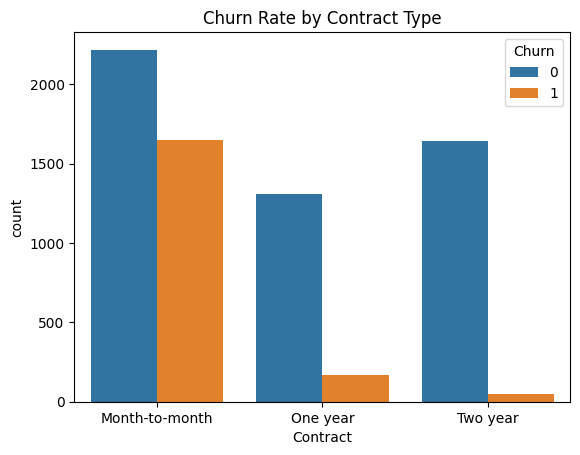

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.show()

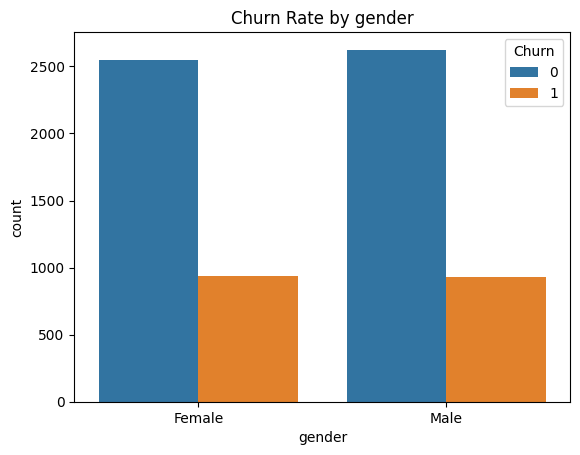

In [58]:
# Churn by gender
sns.countplot(data=df, x="gender", hue="Churn")
plt.title('Churn Rate by gender')
plt.show()

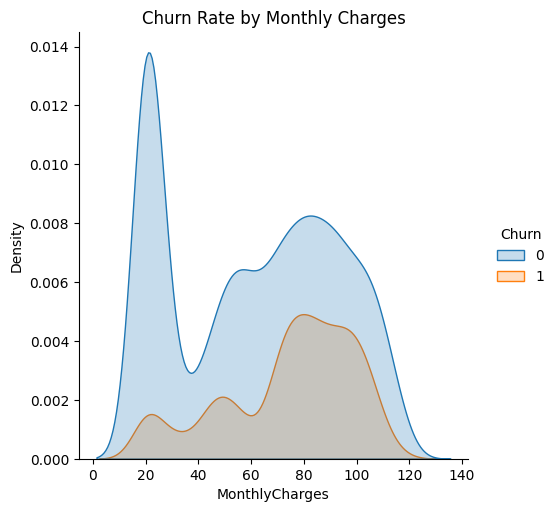

In [59]:
# Churn by Monthly Charges
sns.displot(data=df, x='MonthlyCharges', hue='Churn', kind='kde', fill=True)
plt.title('Churn Rate by Monthly Charges')
plt.show()

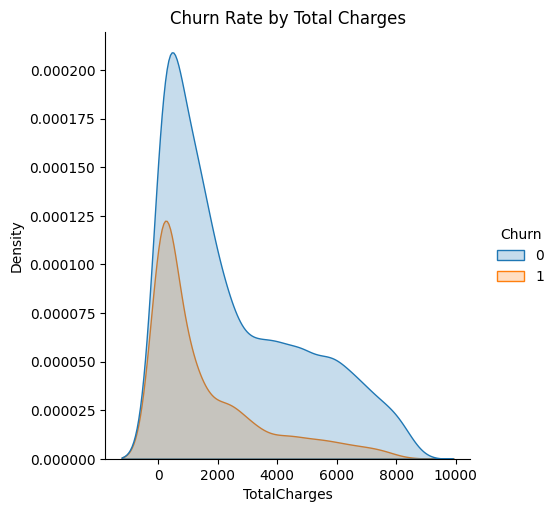

In [60]:
# Churn by Total charges
sns.displot(data=df, x='TotalCharges', hue='Churn', kind='kde', fill=True)
plt.title('Churn Rate by Total Charges') 
plt.show()

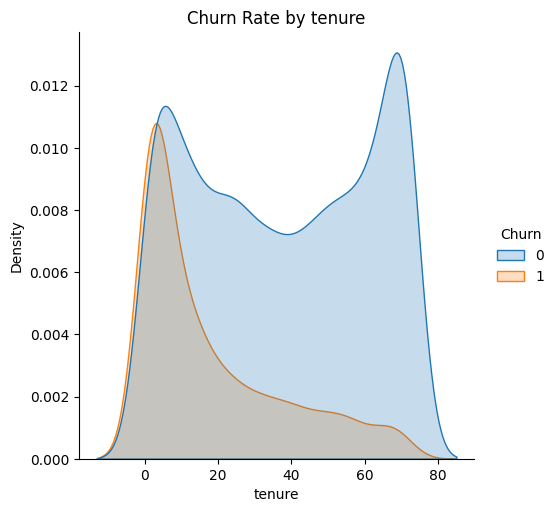

In [61]:
# Churn by tenure
sns.displot(data=df, x='tenure', hue='Churn', kind='kde', fill=True)
plt.title('Churn Rate by tenure')
plt.show()

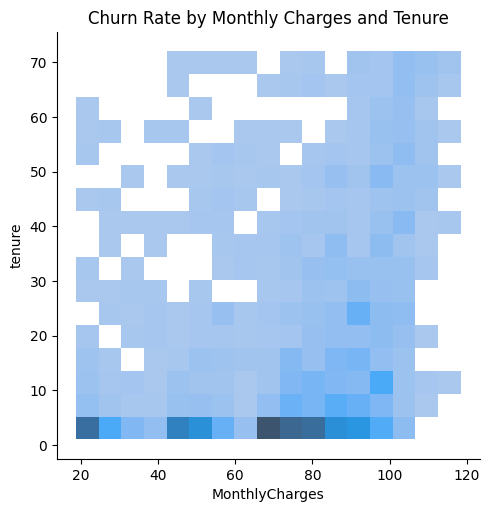

In [62]:
# Churn by monthly charges and tenure
sns.displot(data=df[df["Churn"]==1], x='MonthlyCharges', y='tenure')
plt.title('Churn Rate by Monthly Charges and Tenure')
plt.show()

# 4. Machine Learning

In [63]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(f"Column type: categorical")
        print("-"*50)
        print("Unique values: ", df[col].unique())
        print("-"*50)
        print("Value counts: ")
        print(df[col].value_counts())
        print("\n")
    else:
        print(col)
        print(f"Column type: numerical")
        print("-"*50)
        print("Summary statistics: ")
        print(df[col].describe())

customerID
Column type: categorical
--------------------------------------------------
Unique values:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
Value counts: 
customerID
7590-VHVEG    1
0463-TXOAK    1
1928-BXYIV    1
2956-GGUCQ    1
6008-NAIXK    1
             ..
0020-INWCK    1
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
3186-AJIEK    1
Name: count, Length: 7036, dtype: int64


gender
Column type: categorical
--------------------------------------------------
Unique values:  ['Female' 'Male']
--------------------------------------------------
Value counts: 
gender
Male      3552
Female    3484
Name: count, dtype: int64


SeniorCitizen
Column type: numerical
--------------------------------------------------
Summary statistics: 
count    7036.000000
mean        0.162166
std         0.368629
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

## Logistic Regression

In [65]:
# Define the target variable and features
X = df.drop('Churn', axis=1)
y = df['Churn']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define transformations for each column type
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create a pipeline that first transforms the data and then fits a Logistic Regression model
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
log_reg_pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = log_reg_pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

Accuracy: 0.7961647727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.62      0.58      0.60       373

    accuracy                           0.80      1408
   macro avg       0.74      0.73      0.73      1408
weighted avg       0.79      0.80      0.79      1408

Confusion Matrix:
 Predicted    0    1
Actual             
0          905  130
1          157  216


## Decision Trees

In [66]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with a Decision Tree Classifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model
decision_tree_pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = decision_tree_pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

Accuracy: 0.7507102272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1035
           1       0.53      0.50      0.52       373

    accuracy                           0.75      1408
   macro avg       0.68      0.67      0.67      1408
weighted avg       0.75      0.75      0.75      1408

Confusion Matrix:
 Predicted    0    1
Actual             
0          870  165
1          186  187


In [68]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a Random Forest Classifier
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Train the model
random_forest_pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = random_forest_pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))


Accuracy: 0.7911931818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.55       373

    accuracy                           0.79      1408
   macro avg       0.73      0.69      0.71      1408
weighted avg       0.78      0.79      0.78      1408

Confusion Matrix:
 Predicted    0    1
Actual             
0          933  102
1          192  181
